In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
snarp = pd.read_csv("/content/drive/MyDrive/data3.csv")

In [ ]:
snarp.describe()

,Age,Number_of_sexual_partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.0,589.000000,589.000000,589.000000,589.000000,589.0,589.000000,589.0,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,27.860781,2.555178,17.239389,2.376910,0.140917,1.286580,0.485146,0.646859,2.362041,0.120543,0.575806,0.105263,0.179966,0.059423,0.0,0.006791,0.057725,0.025467,0.001698,0.0,0.001698,0.0,0.022071,0.001698,0.003396,0.100170,0.028862,0.003396,0.025467,0.025467,0.042445,0.091681,0.061121,0.062818
std,8.964460,1.656494,2.938498,1.507535,0.348231,4.363316,2.460488,0.478352,3.851610,0.325873,2.099984,0.307153,0.572801,0.236615,0.0,0.082198,0.233421,0.157672,0.041204,0.0,0.041204,0.0,0.147040,0.041204,0.058222,0.322327,0.167562,0.058222,0.157672,0.157672,0.201773,0.288820,0.239755,0.242842
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import os
print(os.listdir("/content"))

['.config', 'drive', 'sample_data']


In [ ]:
%matplotlib inline
import random
from pprint import pprint

In [ ]:
snarp.head(5)

,Age,Number_of_sexual_partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,52,5,16,4,1,37.0,37.0,1,3.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,46,3,21,4,0,0.0,0.0,1,15.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,3,23,2,0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pima = snarp.iloc[:,1:].values

In [ ]:
print(type(pima))

<class 'numpy.ndarray'>


In [ ]:
pima.shape

(589, 33)

In [ ]:
age = snarp["Age"].values

In [ ]:
number_of_sexual_partners = snarp["Number_of_sexual_partners"].values

In [ ]:
first_sexual_intercourse = snarp["First sexual intercourse"].values

In [ ]:
number_of_pregnancies = snarp["Num of pregnancies"].values

In [ ]:
smokes = snarp["Smokes"].values

In [ ]:
smokes_years = snarp["Smokes (years)"].values

In [ ]:
smokes_packs_years = snarp["Smokes (packs/year)"].values

In [ ]:
hormonal_contraceptives = snarp["Hormonal Contraceptives"].values

In [ ]:
hormonal_contraceptives_years = snarp["Hormonal Contraceptives (years)"].values

In [ ]:
iud = snarp["IUD"].values

In [ ]:
std = snarp["STDs"].values

In [ ]:
std_number = snarp["STDs (number)"].values

In [ ]:
std_condylomatosis = snarp["STDs:condylomatosis"].values

In [ ]:
std_cervical_condylomatosis = snarp["STDs:cervical condylomatosis"].values

In [ ]:
std_vaginal_condylomatosis = snarp["STDs:vaginal condylomatosis"].values

In [ ]:
std_vulvo_perineal_condylomatosis = snarp["STDs:vulvo-perineal condylomatosis"].values

In [ ]:
std_syphilis = snarp["STDs:syphilis"].values

In [ ]:
std_pelvic_inflammatory_disease = snarp["STDs:pelvic inflammatory disease"].values

In [ ]:
std_genital_herpes = snarp["STDs:genital herpes"].values

In [ ]:
std_molluscum_contagiosum = snarp["STDs:molluscum contagiosum"].values

In [ ]:
std_cervical_condylomatosis = snarp["STDs:cervical condylomatosis"].values

In [ ]:
std_aids = snarp["STDs:AIDS"].values

In [ ]:
std_hiv = snarp["STDs:HIV"].values

In [ ]:
std_hepatitisB = snarp["STDs:Hepatitis B"].values

In [ ]:
std_hpv = snarp["STDs:HPV"].values

In [ ]:
std_num_of_diagnosis = snarp["STDs: Number of diagnosis"].values

In [ ]:
cancer = snarp["Dx:Cancer"].values

In [ ]:
cin = snarp["Dx:CIN"].values

In [ ]:
hpv = snarp["Dx:HPV"].values

In [ ]:
dx = snarp["Dx"].values

In [ ]:
hinselmann = snarp["Hinselmann"].values

In [ ]:
schiller = snarp["Schiller"].values

In [ ]:
citology = snarp["Citology"].values

In [ ]:
biopsy = snarp["Biopsy"].values

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard, ProgbarLogger
from keras import metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.model_selection import train_test_split

In [ ]:
input_shape=(4,1)

In [ ]:
#Initialize RNN:
model = Sequential()

#Adding the first RNN layer and some Dropout regularization
model.add(LSTM(units = 220, dropout=0.05, recurrent_dropout=0.20, return_sequences=True, input_shape= (4,1)))

#Adding the second RNN layer and some Dropout regularization
model.add(LSTM(units = 150, dropout=0.05, recurrent_dropout=0.20, return_sequences=True))

#Adding the third RNN layer and some Dropout regularization
model.add(LSTM(units = 64, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))

#Adding the output layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(2, activation='softmax'))

#Compile the RNN
model.compile(optimizer='adamax', loss='categorical_crossentropy' , metrics=['acc','mse', 'mae', 'mape'])

#Fitting the RNN to the Training set
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 4, 220)            195360    
_________________________________________________________________
lstm_10 (LSTM)               (None, 4, 150)            222600    
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                55040     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 28)                1820      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                

In [ ]:
x = age*number_of_sexual_partners*number_of_pregnancies

In [ ]:
y = cancer

In [ ]:
x.shape

(589,)

In [ ]:
x = np.delete(x, 588)

In [ ]:
x.shape


(588,)

In [ ]:
x = x.reshape(147,4,1)

In [ ]:
y = np.delete(y, 588)

In [ ]:
y.shape


(588,)

In [ ]:
y = y.reshape(294,2)

In [ ]:
history = model.fit(x, y, epochs=20, batch_size=64, verbose=1, validation_split=0.1)

Epoch 1/20
3/3 [==============================] - 14s 1s/step - loss: 0.0288 - acc: 0.9557 - mse: 0.2499 - mae: 0.4997 - mape: 489300848.0000 - val_loss: 0.0529 - val_acc: 0.9333 - val_mse: 0.2550 - val_mae: 0.5032 - val_mape: 484922720.0000
Epoch 2/20
3/3 [==============================] - 0s 65ms/step - loss: 0.0314 - acc: 0.9846 - mse: 0.2522 - mae: 0.4996 - mape: 488246720.0000 - val_loss: 0.0622 - val_acc: 0.9333 - val_mse: 0.2663 - val_mae: 0.5071 - val_mape: 486879584.0000
Epoch 3/20
3/3 [==============================] - 0s 68ms/step - loss: 0.0348 - acc: 0.9807 - mse: 0.2591 - mae: 0.4981 - mape: 485557864.0000 - val_loss: 0.0684 - val_acc: 0.9333 - val_mse: 0.2766 - val_mae: 0.5095 - val_mape: 488059040.0000
Epoch 4/20
3/3 [==============================] - 0s 64ms/step - loss: 0.0327 - acc: 0.9807 - mse: 0.2677 - mae: 0.4980 - mape: 486490560.0000 - val_loss: 0.0723 - val_acc: 0.9333 - val_mse: 0.2844 - val_mae: 0.5108 - val_mape: 488739104.0000
Epoch 5/20
3/3 [=============

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
   keras.layers.Dense(4, activation=tf.nn.relu),
	keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.compile(optimizer='adam',
             loss='mse',
             metrics=['accuracy'])

history = model.fit(x, y, epochs=20, batch_size=64, verbose=1, validation_split=0.1)

Epoch 1/20
3/3 [==============================] - 1s 400ms/step - loss: 0.1363 - accuracy: 0.8864 - val_loss: 0.0351 - val_accuracy: 0.9667
Epoch 2/20
3/3 [==============================] - 0s 12ms/step - loss: 0.1250 - accuracy: 0.9091 - val_loss: 0.0352 - val_accuracy: 0.9667
Epoch 3/20
3/3 [==============================] - 0s 12ms/step - loss: 0.1223 - accuracy: 0.9091 - val_loss: 0.0353 - val_accuracy: 0.9667
Epoch 4/20
3/3 [==============================] - 0s 26ms/step - loss: 0.1196 - accuracy: 0.9091 - val_loss: 0.0354 - val_accuracy: 0.9667
Epoch 5/20
3/3 [==============================] - 0s 12ms/step - loss: 0.1181 - accuracy: 0.9091 - val_loss: 0.0355 - val_accuracy: 0.9667
Epoch 6/20
3/3 [==============================] - 0s 12ms/step - loss: 0.1166 - accuracy: 0.9091 - val_loss: 0.0356 - val_accuracy: 0.9667
Epoch 7/20
3/3 [==============================] - 0s 13ms/step - loss: 0.1151 - accuracy: 0.9091 - val_loss: 0.0356 - val_accuracy: 0.9667
Epoch 8/20
3/3 [==========

In [ ]:
history.history??

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

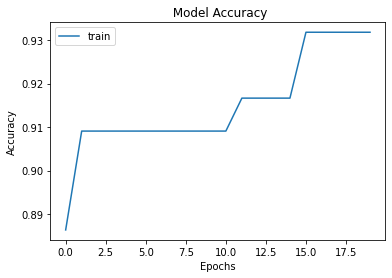

In [ ]:
plt.plot(history.history['accuracy'])
plt.title(' Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

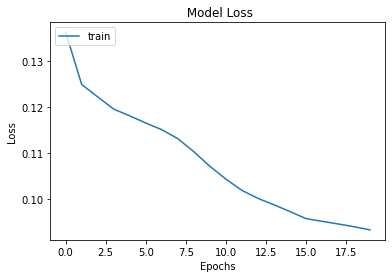

In [ ]:
plt.plot(history.history['loss'])
plt.title(' Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train'], loc='upper left')
plt.show()